In [3]:
# importing important liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/nlili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Reading a TSV file (using read_csv with tab separator)
df = pd.read_csv('/Users/nlili/Downloads/amazon_alexa.tsv', sep='\t')


In [15]:
df.shape

(3150, 5)

In [16]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [17]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [18]:
df[df['verified_reviews'].isnull()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [19]:
df.dropna(inplace=True)

In [20]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [21]:
df['Length']= df['verified_reviews'].apply(len)

In [22]:
df.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [23]:
len(df.iloc[0]['verified_reviews'])

13

In [24]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
Length              0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   Length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


In [26]:
from wordcloud import WordCloud

In [27]:
df.rating.value_counts()*100/len(df)

rating
5    72.594474
4    14.449031
1     5.112734
3     4.826929
2     3.016831
Name: count, dtype: float64

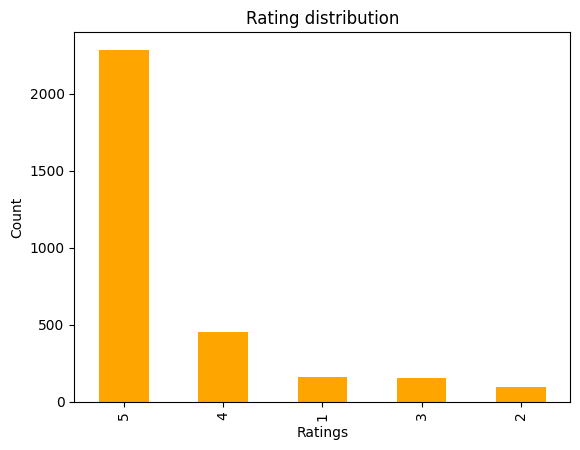

In [28]:
# PLotting the graph
df.rating.value_counts().plot.bar(color='orange')
plt.title('Rating distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

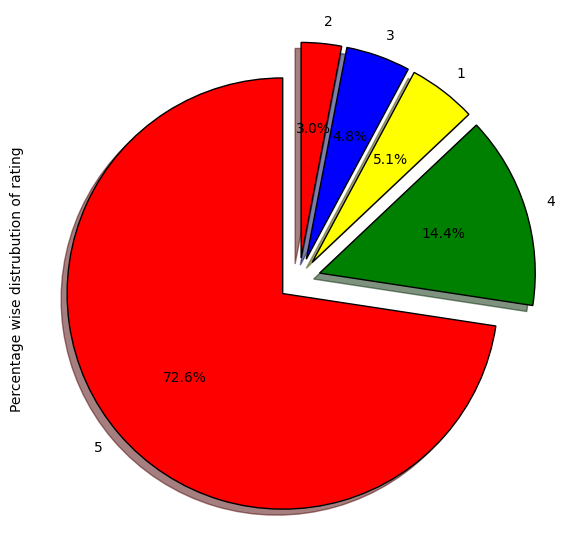

In [29]:
fig = plt.figure(figsize=(7,7))
colors = ('red','green','yellow','blue')
wp = {'linewidth':1, 'edgecolor':'black'}
tags = df['rating'].value_counts()/len(df)

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [30]:
# Analysing feedback column
df['feedback'].value_counts()*100/len(df)

feedback
1    91.870435
0     8.129565
Name: count, dtype: float64

In [31]:
# see the record
review_0= df[df['feedback']==1].iloc[1]['verified_reviews']

In [32]:
review_0

'Loved it!'

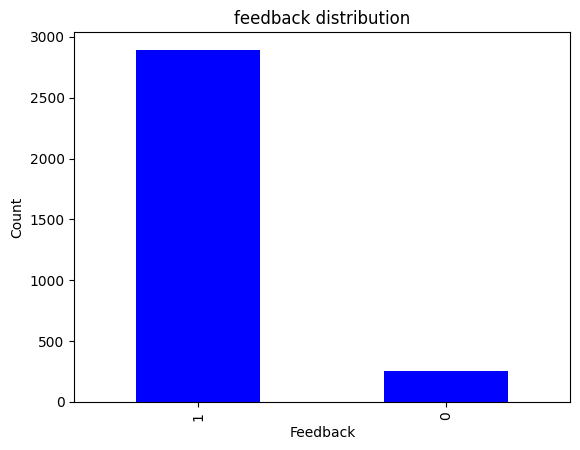

In [33]:
df['feedback'].value_counts().plot.bar(color='blue')
plt.title('feedback distribution')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

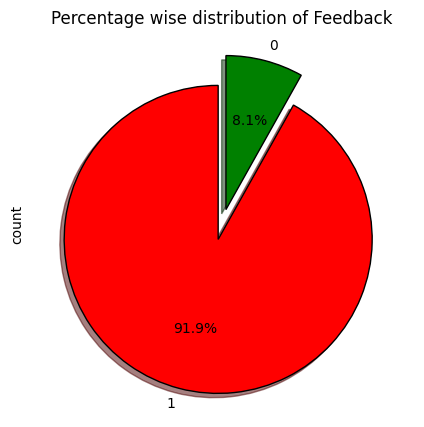

In [34]:
# Assuming df['feedback'] contains categorical feedback data (e.g., 'positive', 'negative', etc.)
fig = plt.figure(figsize=(5, 5))

# Pie chart properties
colors = ['red', 'green', 'blue', 'yellow', 'purple']  # Add more colors if you have more categories
wp = {'linewidth': 1, 'edgecolor': 'black'}

# Calculate the percentage distribution of feedback
tags = df['feedback'].value_counts() / len(df)

# Exploding slices (adjust if necessary to match the number of categories)
explode = [0.1] * len(tags)

# Plotting the pie chart
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90,
          wedgeprops=wp, explode=explode)

# Title of the pie chart
plt.title('Percentage wise distribution of Feedback')

# Save the plot to a BytesIO object
graph = BytesIO()
fig.savefig(graph, format="png")

# Display the plot (optional)
plt.show()

In [35]:
## Comparing feedback and ratings
df[df['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [36]:
## Comparing feedback and ratings
df[df['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [37]:
# Analysing variation column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   Length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


In [38]:
df['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

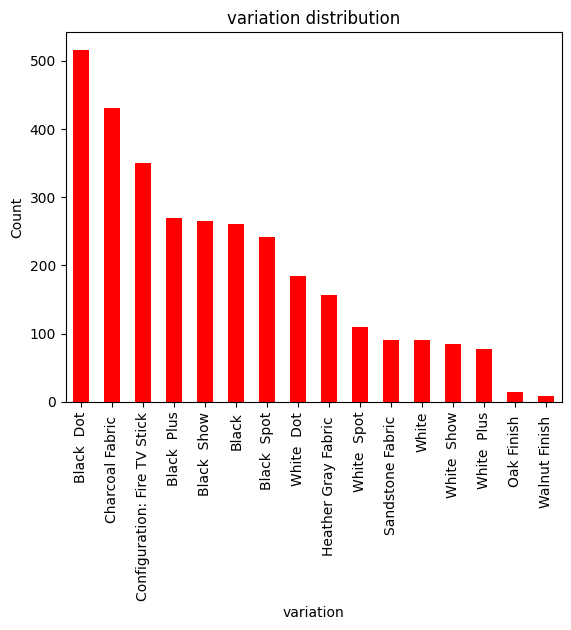

In [39]:
df['variation'].value_counts().plot.bar(color='red')
plt.title('variation distribution')
plt.xlabel('variation')
plt.ylabel('Count')
plt.show()

In [40]:
df['variation'].value_counts()*100/len(df)

variation
Black  Dot                      16.386154
Charcoal Fabric                 13.655129
Configuration: Fire TV Stick    11.114640
Black  Plus                      8.574151
Black  Show                      8.415370
Black                            8.288346
Black  Spot                      7.653223
White  Dot                       5.843125
Heather Gray Fabric              4.985710
White  Spot                      3.461416
Sandstone Fabric                 2.858050
White                            2.858050
White  Show                      2.699270
White  Plus                      2.476977
Oak Finish                       0.444586
Walnut Finish                    0.285805
Name: count, dtype: float64

In [41]:
# Variation versus ratings
df.groupby('variation')['rating'].mean()


variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

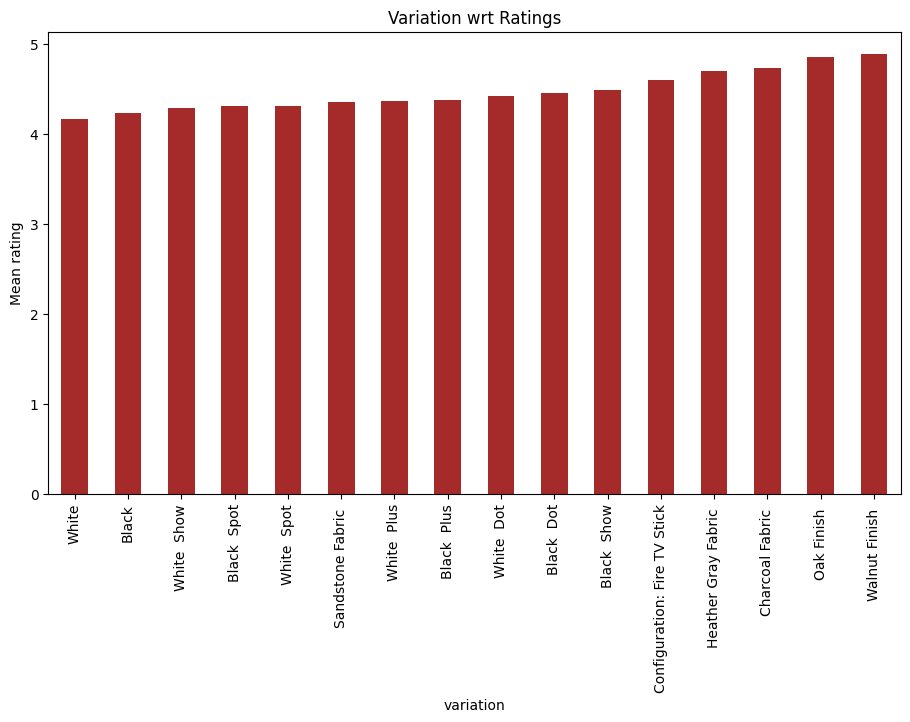

In [42]:
# Analysing the above rayings
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown', figsize=(11,6))
plt.title('Variation wrt Ratings')
plt.xlabel('variation')
plt.ylabel('Mean rating')
plt.show()

In [43]:
## Analysing verified reviews

df['Length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: Length, dtype: float64

[Text(0.5, 1.0, 'Distribution of the length of reviews')]

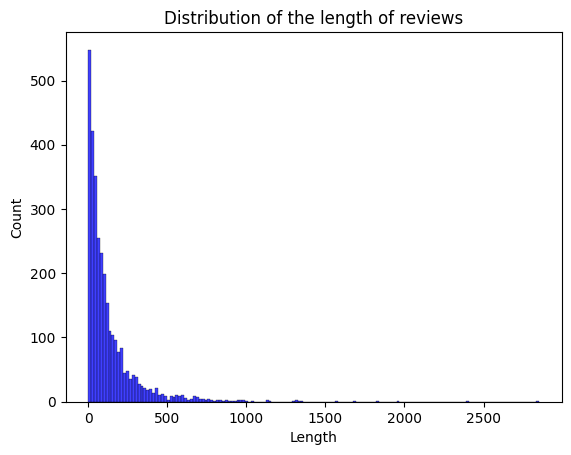

In [44]:
# histogram for the length of verified reviews
sns.histplot(df['Length'], color='blue').set(title="Distribution of the length of reviews")


[Text(0.5, 1.0, 'Distribution of the length of reviews when feedback is 0')]

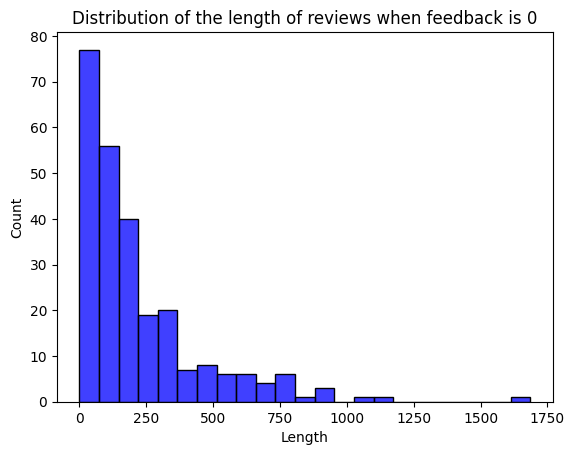

In [45]:
sns.histplot(df[df['feedback']==0]['Length'], color='blue').set(title="Distribution of the length of reviews when feedback is 0")

[Text(0.5, 1.0, 'Distribution of the length of reviews when feedback is 1')]

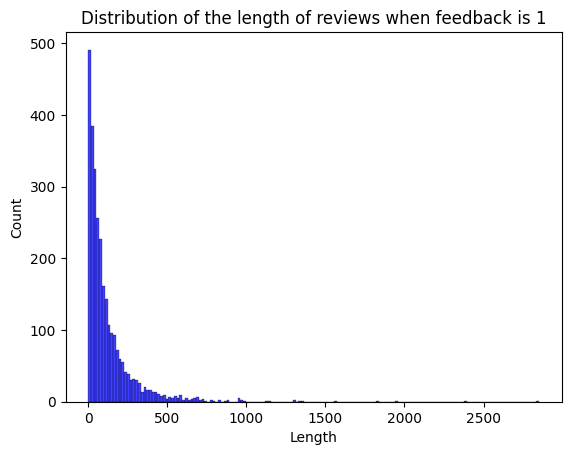

In [46]:
sns.histplot(df[df['feedback']==1]['Length'], color='blue').set(title="Distribution of the length of reviews when feedback is 1")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   Length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


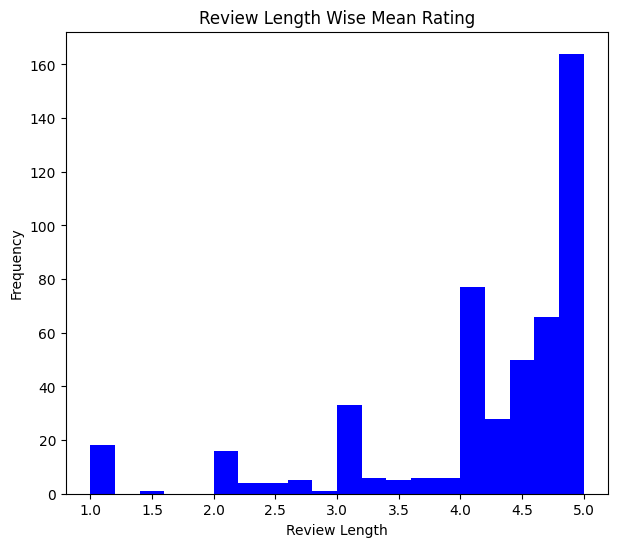

In [49]:
# length wise mean rating

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, and it has the columns 'Length' and 'rating'
df.groupby('Length')['rating'].mean().plot.hist(color='blue', figsize=(7, 6), bins=20)

# Title and labels
plt.title("Review Length Wise Mean Rating")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [52]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
words= cv.fit_transform(df.verified_reviews)

In [53]:
# combine all reviwes

reviews = ' '.join([review for review in df['verified_reviews']])

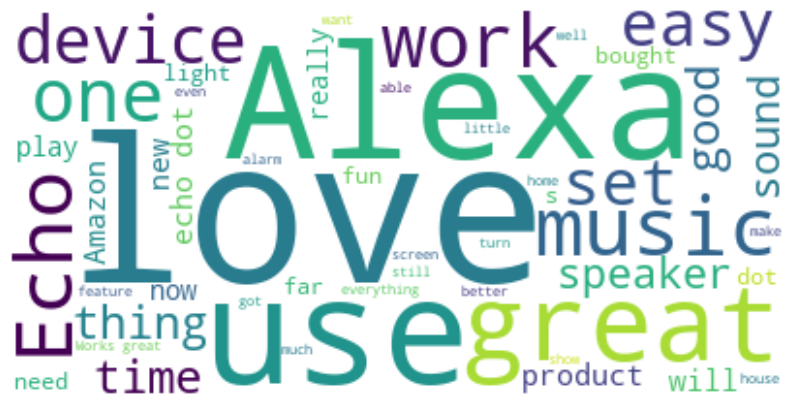

In [59]:
# Initialize the WordCloud object with desired configurations
wc = WordCloud(background_color='white', max_words=50)

# Generate the word cloud
wc.generate(reviews)

# Create a plot with specified figure size
plt.figure(figsize=(10,10))

# Display the generated word cloud
plt.imshow(wc, interpolation='bilinear')

# Hide the axes for a cleaner visualization
plt.axis('off')

# Show the plot
plt.show()

In [63]:
# Finding te unique words in each feedback category
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

unique_neg = [x for x in neg_reviews if x not in pos_reviews]
unique_neg = " ".join(unique_neg)

unique_pos = [x for x in pos_reviews if x not in neg_reviews]
unique_pos= " ".join(unique_pos)


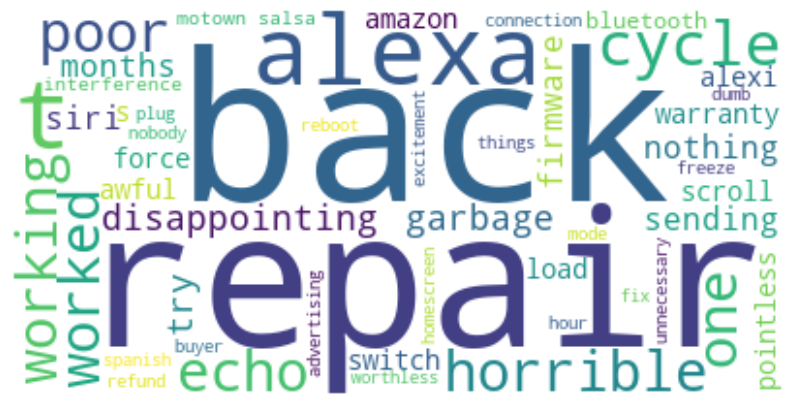

In [65]:
wc = WordCloud(background_color='white', max_words=50)
# Generate the word cloud
wc.generate(unique_neg)

# Create a plot with specified figure size
plt.figure(figsize=(10,10))

# Display the generated word cloud
plt.imshow(wc, interpolation='bilinear')

# Hide the axes for a cleaner visualization
plt.axis('off')

# Show the plot
plt.show()

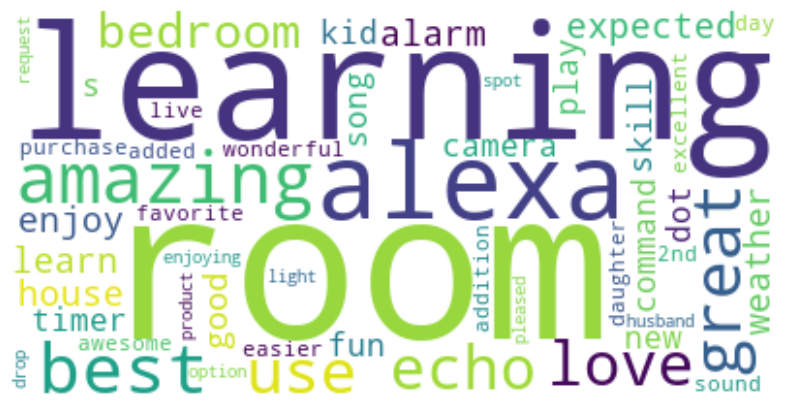

In [66]:
wc = WordCloud(background_color='white', max_words=50)
# Generate the word cloud
wc.generate(unique_pos)

# Create a plot with specified figure size
plt.figure(figsize=(10,10))

# Display the generated word cloud
plt.imshow(wc, interpolation='bilinear')

# Hide the axes for a cleaner visualization
plt.axis('off')

# Show the plot
plt.show()

In [69]:
# Preprocessing and modeling
import re
corpus = []
stemmer = PorterStemmer()
for i in range(0,df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)



In [70]:
cv = CountVectorizer(max_features = 2500)

In [72]:
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values


In [73]:
X.shape

(3149, 2500)

In [74]:
y.shape

(3149,)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

Training Accuracy : 0.9927404718693285
Testing Accuracy : 0.9216931216931217


In [93]:
from sklearn.metrics import confusion_matrix
y_pred= rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

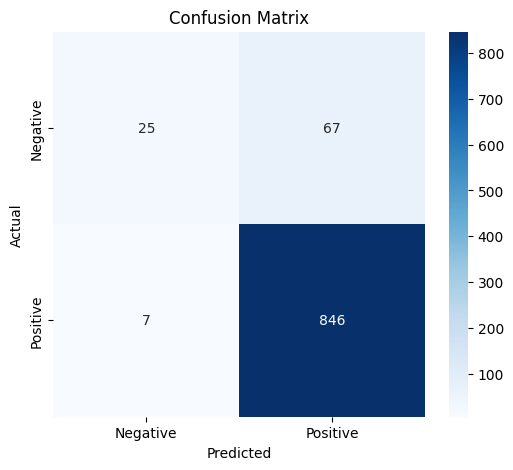

In [94]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [96]:
# Importing XGBClassifier from the XGBoost library
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xg = XGBClassifier(random_state=42)

# Fit the model on the training data
xg.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [97]:
# Accuracy of the XGBoost model on training and testing data
print("Training Accuracy :", xg.score(X_train, y_train))  # Use 'xg' since that is your defined model
print("Testing Accuracy :", xg.score(X_test, y_test))  # Same here


Training Accuracy : 0.9750453720508166
Testing Accuracy : 0.9206349206349206


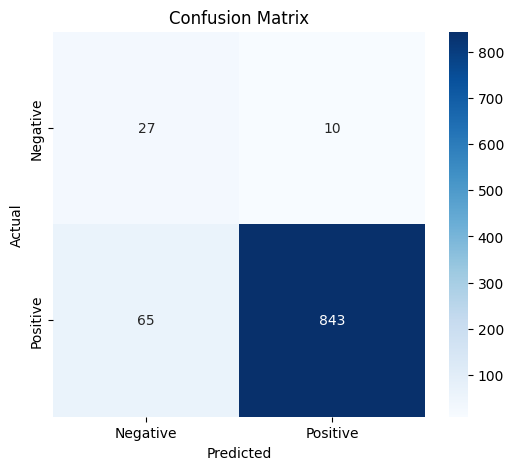

In [101]:
y_pred2= xg.predict(X_test)
cm2= confusion_matrix(y_pred2, y_test)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [103]:
# Decsion Tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
y_pred3= dt.predict(X_test)

In [105]:
print("Training Accuracy :", dt.score(X_train, y_train))
print("Testing Accuracy :", dt.score(X_test, y_test))

Training Accuracy : 0.9927404718693285
Testing Accuracy : 0.9195767195767196


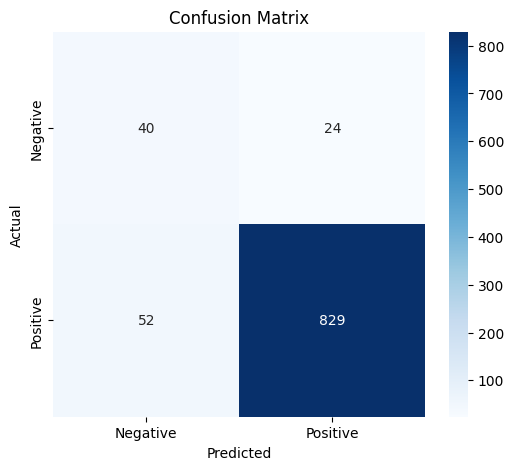

In [106]:

cm3= confusion_matrix(y_pred3, y_test)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()